# Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from sklearn.metrics import mean_squared_error
# !pip install scikeras
# import scikeras

In [ ]:
data=pd.read_csv('drive/MyDrive/Colab Notebooks/data_24.csv',delimiter=',',parse_dates=True,index_col=0)
# y=(data.iloc[:,-2]-data.iloc[:,-1])#.values
y=data.iloc[:,-2:]
X=data.iloc[:,:-2]#.values

In [ ]:
y.std()

,0
sum(physicalFlow)0 inflow,1.816424e+06
sum(physicalFlow)1 outflow,2.206746e+06


In [ ]:
y.mean()

,0
sum(physicalFlow)0 inflow,7.225815e+06
sum(physicalFlow)1 outflow,7.119599e+06


In [ ]:
data

,WindGenForecast,WindGenForecast t-1,WindGenForecast t-2,WindGenForecast t-3,WindGenForecast t-4,WindGenForecast t-5,WindGenForecast t-6,WindGenForecast t-7,WindGenForecast t-8,WindGenForecast t-9,...,TotalLoadForecast t-16,TotalLoadForecast t-17,TotalLoadForecast t-18,TotalLoadForecast t-19,TotalLoadForecast t-20,TotalLoadForecast t-21,TotalLoadForecast t-22,TotalLoadForecast t-23,sum(physicalFlow)0 inflow,sum(physicalFlow)1 outflow
2018-08-02 04:00:00,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,260.0,250.0,...,7799.0,8052.0,8100.0,8003.0,7798.0,7548.0,7170.0,6573.0,5332486.0,4084033.0
2018-08-02 05:00:00,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,260.0,...,7543.0,7799.0,8052.0,8100.0,8003.0,7798.0,7548.0,7170.0,5425152.0,4611564.0
2018-08-02 06:00:00,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,...,7408.0,7543.0,7799.0,8052.0,8100.0,8003.0,7798.0,7548.0,5411656.0,5204580.0
2018-08-02 07:00:00,570.0,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,...,7259.0,7408.0,7543.0,7799.0,8052.0,8100.0,8003.0,7798.0,5792693.0,5379787.0
2018-08-02 08:00:00,580.0,570.0,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,...,7127.0,7259.0,7408.0,7543.0,7799.0,8052.0,8100.0,8003.0,5735920.0,5706807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 19:00:00,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,476.0,496.0,...,4951.0,4806.0,4900.0,5023.0,5102.0,5734.0,6345.0,6804.0,7602602.0,11077110.0
2022-01-31 20:00:00,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,476.0,...,5497.0,4951.0,4806.0,4900.0,5023.0,5102.0,5734.0,6345.0,7418126.0,10019737.0
2022-01-31 21:00:00,1668.0,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,...,6349.0,5497.0,4951.0,4806.0,4900.0,5023.0,5102.0,5734.0,7407216.0,9476736.0
2022-01-31 22:00:00,1740.0,1668.0,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,...,7027.0,6349.0,5497.0,4951.0,4806.0,4900.0,5023.0,5102.0,7398530.0,8326807.0


# Feature engineering

In [ ]:
f=lambda x: x.hour
ff=np.vectorize(f)
hour_of_day=ff(X.index.to_pydatetime())
X.loc[:, "hour"]=hour_of_day
X

<ipython-input-9-53c44885d1b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, "hour"]=hour_of_day


,WindGenForecast,WindGenForecast t-1,WindGenForecast t-2,WindGenForecast t-3,WindGenForecast t-4,WindGenForecast t-5,WindGenForecast t-6,WindGenForecast t-7,WindGenForecast t-8,WindGenForecast t-9,...,TotalLoadForecast t-15,TotalLoadForecast t-16,TotalLoadForecast t-17,TotalLoadForecast t-18,TotalLoadForecast t-19,TotalLoadForecast t-20,TotalLoadForecast t-21,TotalLoadForecast t-22,TotalLoadForecast t-23,hour
2018-08-02 04:00:00,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,260.0,250.0,...,7543.0,7799.0,8052.0,8100.0,8003.0,7798.0,7548.0,7170.0,6573.0,4
2018-08-02 05:00:00,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,260.0,...,7408.0,7543.0,7799.0,8052.0,8100.0,8003.0,7798.0,7548.0,7170.0,5
2018-08-02 06:00:00,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,260.0,...,7259.0,7408.0,7543.0,7799.0,8052.0,8100.0,8003.0,7798.0,7548.0,6
2018-08-02 07:00:00,570.0,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,270.0,...,7127.0,7259.0,7408.0,7543.0,7799.0,8052.0,8100.0,8003.0,7798.0,7
2018-08-02 08:00:00,580.0,570.0,550.0,520.0,470.0,430.0,390.0,350.0,320.0,300.0,...,7208.0,7127.0,7259.0,7408.0,7543.0,7799.0,8052.0,8100.0,8003.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 19:00:00,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,476.0,496.0,...,5497.0,4951.0,4806.0,4900.0,5023.0,5102.0,5734.0,6345.0,6804.0,19
2022-01-31 20:00:00,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,476.0,...,6349.0,5497.0,4951.0,4806.0,4900.0,5023.0,5102.0,5734.0,6345.0,20
2022-01-31 21:00:00,1668.0,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,489.0,...,7027.0,6349.0,5497.0,4951.0,4806.0,4900.0,5023.0,5102.0,5734.0,21
2022-01-31 22:00:00,1740.0,1668.0,1594.0,1483.0,1339.0,1157.0,957.0,770.0,620.0,534.0,...,7578.0,7027.0,6349.0,5497.0,4951.0,4806.0,4900.0,5023.0,5102.0,22


# Split input data in 3 sets (train, validation, testing)

In [ ]:
# https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
from sklearn.model_selection import train_test_split

train_ratio = 0.75 # training
validation_ratio = 0.15 # hyperparameter tuning
test_ratio = 0.10 # final evaluation

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=test_ratio,shuffle=False, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio/(1-test_ratio),shuffle=False, random_state=1)

# print('train percent',X_train.index.size/X.index.size)
# print('validation percent',X_val.index.size/X.index.size)
# print('test percent',X_test.index.size/X.index.size)
print('train percent',y_train.index.size/X.index.size, '\ttrain days',y_train.index.size/24 )
print('validation percent',y_val.index.size/X.index.size,'\tvalid days',y_val.index.size/24)
print('test percent',y_test.index.size/X.index.size,'\ttest days',y_test.index.size/24)
# print('train percent',y_train.size/X.size, '\ttrain days',y_train.index.size/24 )

train percent 0.7499736370346937 	train days 889.0
validation percent 0.1500228479032655 	valid days 177.83333333333334
test percent 0.10000351506204085 	test days 118.54166666666667


In [ ]:
train_idx=X_train.index
val_idx=X_val.index
test_idx=X_test.index
test_idx

DatetimeIndex(['2021-10-05 00:00:00', '2021-10-05 01:00:00',
               '2021-10-05 02:00:00', '2021-10-05 03:00:00',
               '2021-10-05 04:00:00', '2021-10-05 05:00:00',
               '2021-10-05 06:00:00', '2021-10-05 07:00:00',
               '2021-10-05 08:00:00', '2021-10-05 09:00:00',
               ...
               '2022-01-31 14:00:00', '2022-01-31 15:00:00',
               '2022-01-31 16:00:00', '2022-01-31 17:00:00',
               '2022-01-31 18:00:00', '2022-01-31 19:00:00',
               '2022-01-31 20:00:00', '2022-01-31 21:00:00',
               '2022-01-31 22:00:00', '2022-01-31 23:00:00'],
              dtype='datetime64[ns]', length=2845, freq=None)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


X_train=sc.fit_transform(X_train)
X_val=sc.transform(X_val)
X_test=sc.transform(X_test)

In [ ]:
# from sklearn.utils import shuffle
# X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

In [ ]:
X_train

array([[-0.71679323, -0.7896006 , -0.86239965, ...,  1.21695666,
         0.69316009, -1.08452315],
       [-0.62564085, -0.71668737, -0.78949509, ...,  1.54843005,
         1.21678838, -0.94011138],
       [-0.57094943, -0.62554584, -0.71659053, ...,  1.76765848,
         1.54833192, -0.79569962],
       ...,
       [-0.20451687, -0.15160986, -0.0713852 , ..., -1.06564979,
        -1.34697291, -1.51775844],
       [-0.25009306, -0.20447195, -0.15158021, ..., -0.53160933,
        -1.06630113, -1.37334668],
       [-0.31389972, -0.25004272, -0.20443602, ..., -0.02124553,
        -0.53214765, -1.22893491]])

# Training neural networks

## hidden layers: 32-32

### 1 model creation + training process

In [ ]:
%%time
model_name='32-32'
def new_nn():
  ann=tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
  ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
  ann.add(tf.keras.layers.Dense(units=2,activation='linear'))
  ann.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
  return ann

earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',start_from_epoch=5, patience=2500,restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath='{epoch:02d}-32-32-24.keras',save_freq='epoch')

new=new_nn()
history=new.fit(X_train,y_train,epochs=3000,validation_data=(X_val,y_val),callbacks=[earlyStop,modelCheckpoint],verbose=2)


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Epoch 502/3000
667/667 - 2s - 2ms/step - loss: 1655541989376.0000 - mean_absolute_percentage_error: 16.3204 - val_loss: 3475127664640.0000 - val_mean_absolute_percentage_error: 19.1788
Epoch 503/3000
667/667 - 2s - 3ms/step - loss: 1655454957568.0000 - mean_absolute_percentage_error: 16.3176 - val_loss: 3454162436096.0000 - val_mean_absolute_percentage_error: 19.1197
Epoch 504/3000
667/667 - 1s - 2ms/step - loss: 1655265296384.0000 - mean_absolute_percentage_error: 16.3396 - val_loss: 3468322668544.0000 - val_mean_absolute_percentage_error: 19.1649
Epoch 505/3000
667/667 - 1s - 2ms/step - loss: 1654980739072.0000 - mean_absolute_percentage_error: 16.3316 - val_loss: 3490692988928.0000 - val_mean_absolute_percentage_error: 19.2283
Epoch 506/3000
667/667 - 1s - 2ms/step - loss: 1654955573248.0000 - mean_absolute_percentage_error: 16.3244 - val_loss: 3465945808896.0000 - val_mean_absolute_percentage_error: 19.1555
Epoch 507/3000
667/6

In [ ]:
new.save('model/model'+model_name+' '+str(data.columns.size-2)+'.keras')  # The file needs to end with the .keras extension
# uncomment to load
# new = tf.keras.models.load_model('model32-32 72.keras')
from sklearn.metrics import mean_squared_error
print(mean_squared_error(new.predict(X_train),y_train))
print(mean_squared_error(new.predict(X_val),y_val))

667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step
2373009276928.0
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
3180245286912.0


### 2 Plots: mse loss and cross-validation loss

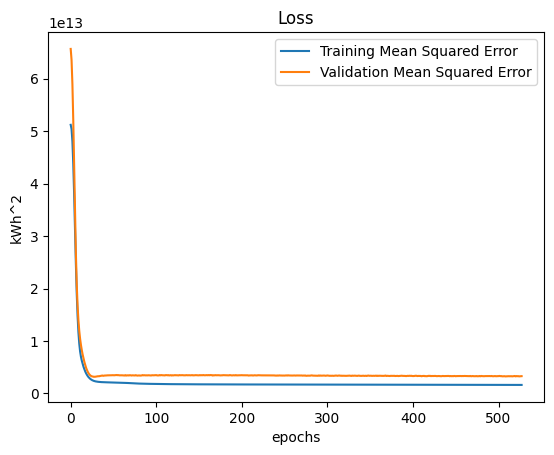

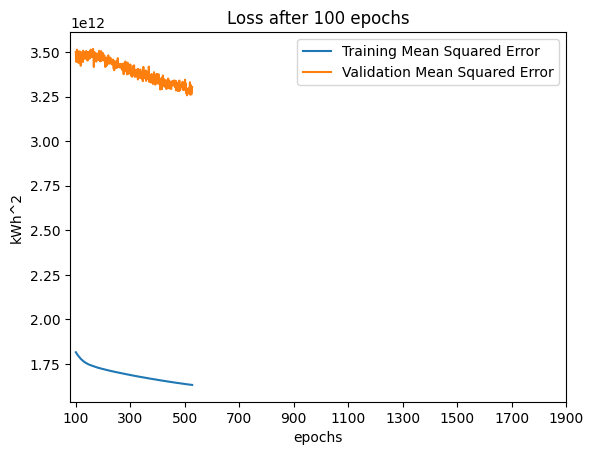

In [ ]:
line1=plt.plot(history.history['loss'],label='Training Mean Squared Error')
line2=plt.plot(history.history['val_loss'],label='Validation Mean Squared Error')
plt.legend()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('kWh^2')
plt.show()
line1=plt.plot(history.history['loss'][100:],label='Training Mean Squared Error')
line2=plt.plot(history.history['val_loss'][100:],label='Validation Mean Squared Error')
plt.xticks( list(range(0,2000,200)), list(range(100,2000,200)))
list(range(len(line1)))
plt.legend()
plt.title('Loss after 100 epochs')
plt.xlabel('epochs')
plt.ylabel('kWh^2')
plt.show()

### 3 Qualitative Plots

In [ ]:
start_train=train_idx[0]
end_train=train_idx[15*24]
print(start_train)

start_val=val_idx[0]
end_val=val_idx[15*24]
print(start_val)

start_test=test_idx[45*24]
end_test=test_idx[45*24+15*24]
print(start_test)

2018-08-02 04:00:00
2021-04-10 04:00:00
2021-11-19 01:00:00


In [ ]:
y_train_prediction=new.predict(X_train)
y_val_prediction=new.predict(X_val)

667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


In [ ]:
a=pd.DataFrame(y_train).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
a['prediction gas inflow']=y_train_prediction[:,0]
a['prediction gas outflow']=y_train_prediction[:,1]
# a.round()
# a['2018-10':'2018-10-10'].plot()

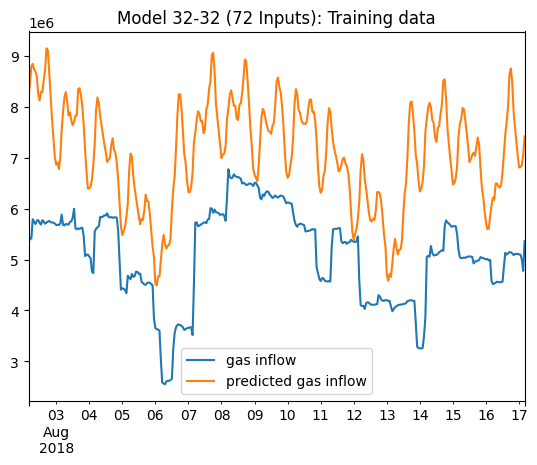

In [ ]:
a[start_train:end_train]['gas inflow'].plot()
a[start_train:end_train]['prediction gas inflow'].plot()
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Training data')
plt.legend(["gas inflow", "predicted gas inflow"])

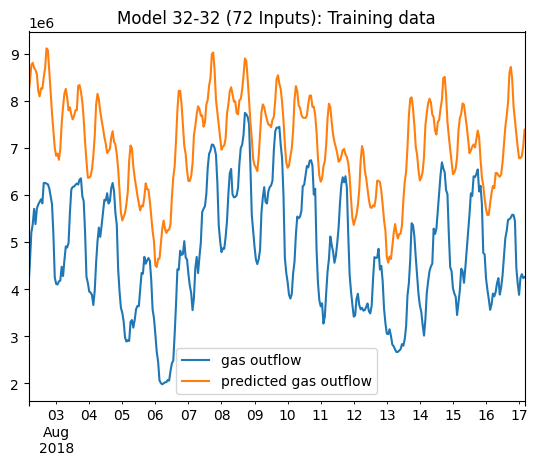

In [ ]:
a[start_train:end_train]['gas outflow'].plot()
a[start_train:end_train]['prediction gas outflow'].plot()
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Training data')
plt.legend(["gas outflow", "predicted gas outflow"])

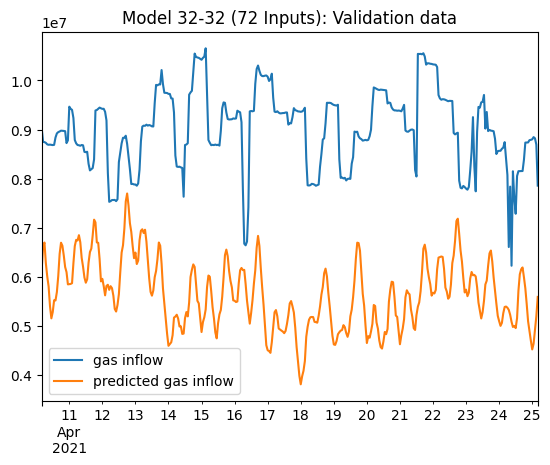

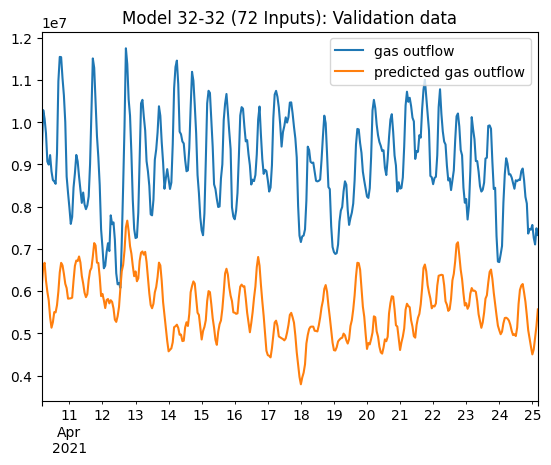

In [ ]:
b=pd.DataFrame(y_val).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_val_prediction[:,0]
b['prediction gas outflow']=y_val_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

b[start_val:end_val]['gas inflow'].plot()
b[start_val:end_val]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Validation data')
plt.show()

b[start_val:end_val]['gas outflow'].plot()
b[start_val:end_val]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Validation data')
plt.show()

## --

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
mse_test:  4494028439552.0
mse test inflow  4310917192898.947
mse test outflow  4677140227273.058
mape_test:  0.21619823575019836
mape test inflow  0.20392488397035327
mape test outflow  0.22847200580555266


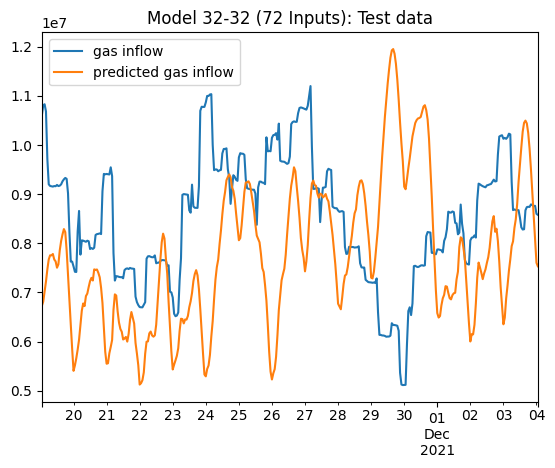

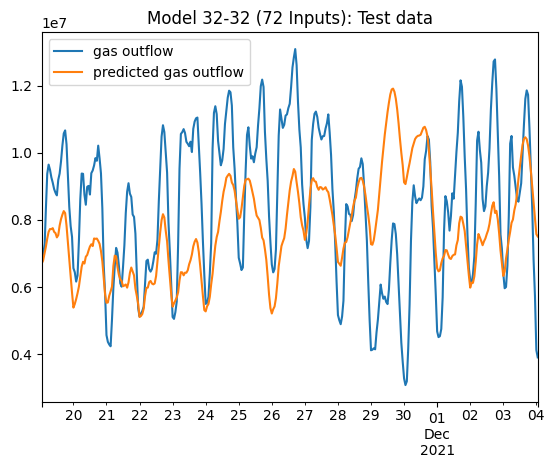

In [ ]:
y_TEST_prediction=new.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error
print('mse_test: ',mean_squared_error(y_test,y_TEST_prediction))

mse_test_inflow=mean_squared_error(y_test['sum(physicalFlow)0 inflow'],y_TEST_prediction[:,0])
mse_test_outflow=mean_squared_error(y_test['sum(physicalFlow)1 outflow'],y_TEST_prediction[:,1])

print('mse test inflow ',mse_test_inflow)
print('mse test outflow ',mse_test_outflow)

mape_test_inflow=mean_absolute_percentage_error(y_test['sum(physicalFlow)0 inflow'],y_TEST_prediction[:,0])
mape_test_outflow=mean_absolute_percentage_error(y_test['sum(physicalFlow)1 outflow'],y_TEST_prediction[:,1])

print('mape_test: ',mean_absolute_percentage_error(y_test,y_TEST_prediction))

print('mape test inflow ',mape_test_inflow)
print('mape test outflow ',mape_test_outflow)

b=pd.DataFrame(y_test).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_TEST_prediction[:,0]
b['prediction gas outflow']=y_TEST_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

b[start_test:end_test]['gas inflow'].plot()
b[start_test:end_test]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Test data')
plt.show()

b[start_test:end_test]['gas outflow'].plot()
b[start_test:end_test]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Model '+ model_name + ' ('+str(data.columns.size-2)+' Inputs): Test data')
plt.show()

mse_train:  1940193990259.7422
mse_val:  4001030924920.2812
mse_test:  3093430309449.476
mape_train:  0.1783097750534261
mape_val:  0.2065978670463095
mape_test:  0.1624057045372041
mape test inflow  0.15452234898362932
mape test outflow  0.17028906009077907


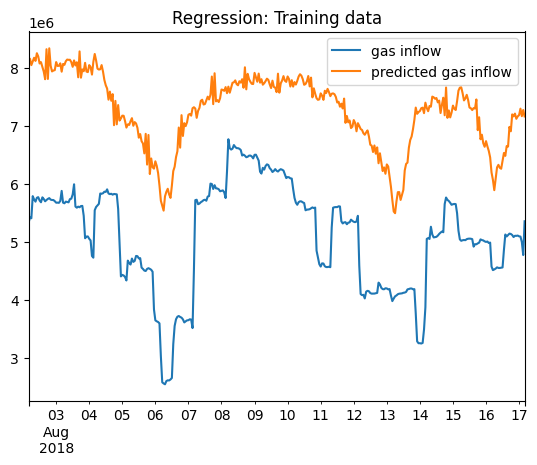

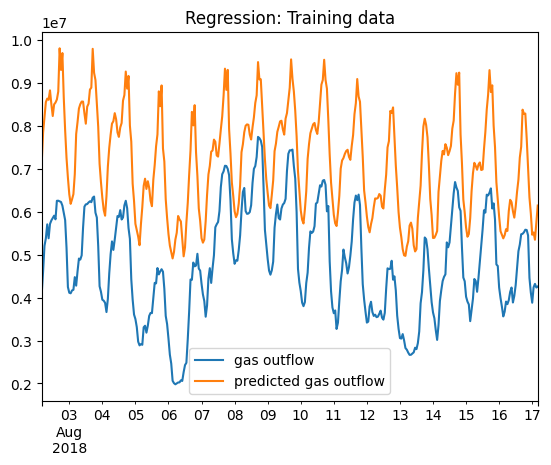

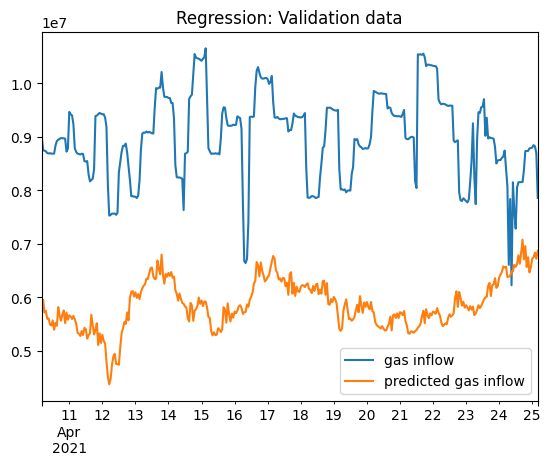

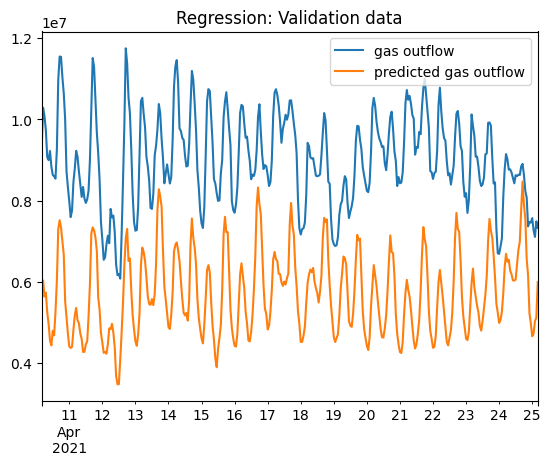

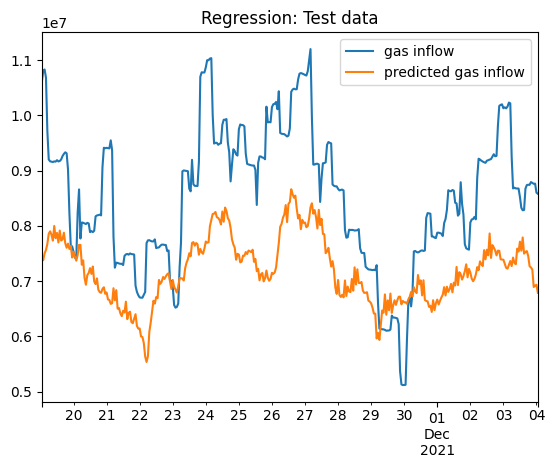

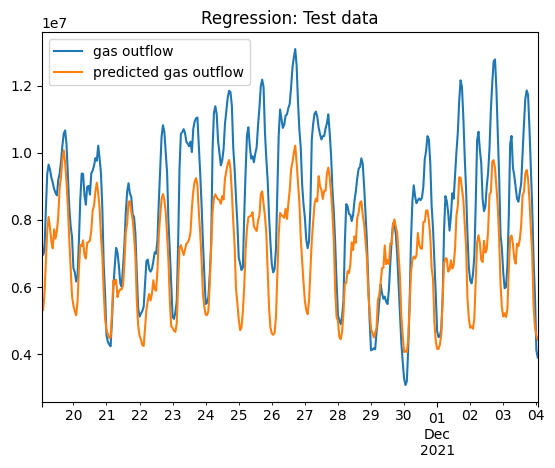

In [ ]:
X_total_train=np.append(X_train,values=X_val,axis=0)
y_total_train=np.append(y_train,values=y_val,axis=0)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_train_prediction=regressor.predict(X_train)
y_val_prediction=regressor.predict(X_val)
y_TEST_prediction=regressor.predict(X_test)

mape_test_inflow=mean_absolute_percentage_error(y_test['sum(physicalFlow)0 inflow'],y_TEST_prediction[:,0])
mape_test_outflow=mean_absolute_percentage_error(y_test['sum(physicalFlow)1 outflow'],y_TEST_prediction[:,1])

print('mse_train: ',mean_squared_error(y_train,y_train_prediction))
print('mse_val: ',mean_squared_error(y_val,y_val_prediction))
print('mse_test: ',mean_squared_error(y_test,y_TEST_prediction))

print('mape_train: ',mean_absolute_percentage_error(y_train,y_train_prediction))
print('mape_val: ',mean_absolute_percentage_error(y_val,y_val_prediction))
print('mape_test: ',mean_absolute_percentage_error(y_test,y_TEST_prediction))


print('mape test inflow ',mape_test_inflow)
print('mape test outflow ',mape_test_outflow)
## train
a=pd.DataFrame(y_train).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
a['prediction gas inflow']=y_train_prediction[:,0]
a['prediction gas outflow']=y_train_prediction[:,1]
# a.round()
# a['2018-10':'2018-10-10'].plot()
a[start_train:end_train]['gas inflow'].plot()
a[start_train:end_train]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Regression: Training data')
plt.show()
a[start_train:end_train]['gas outflow'].plot()
a[start_train:end_train]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Regression: Training data')
plt.show()
## val
b=pd.DataFrame(y_val).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_val_prediction[:,0]
b['prediction gas outflow']=y_val_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

b[start_val:end_val]['gas inflow'].plot()
b[start_val:end_val]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Regression: Validation data')
plt.show()

b[start_val:end_val]['gas outflow'].plot()
b[start_val:end_val]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Regression: Validation data')
plt.show()

b=pd.DataFrame(y_val).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_val_prediction[:,0]
b['prediction gas outflow']=y_val_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

## test
b=pd.DataFrame(y_test).rename(columns={'sum(physicalFlow)0 inflow':'gas inflow','sum(physicalFlow)1 outflow':'gas outflow'})
b['prediction gas inflow']=y_TEST_prediction[:,0]
b['prediction gas outflow']=y_TEST_prediction[:,1]
# b.round()
# b['2018-10':'2018-10-10'].plot()

b[start_test:end_test]['gas inflow'].plot()
b[start_test:end_test]['prediction gas inflow'].plot()
plt.legend(["gas inflow", "predicted gas inflow"])
plt.title('Regression: Test data')
plt.show()

b[start_test:end_test]['gas outflow'].plot()
b[start_test:end_test]['prediction gas outflow'].plot()
plt.legend(["gas outflow", "predicted gas outflow"])
plt.title('Regression: Test data')
plt.show()

# print('mape test inflow 2022 6 ',mean_absolute_percentage_error(y_test['2022-6-20':'2022-6']['sum(physicalFlow)0 inflow'],pd.DataFrame(y_TEST_prediction,index=test_idx)['2022-6-20':'2022-6'][0]))

# b['2022-6':'2022-6']['gas outflow'].plot()
# b['2022-6':'2022-6']['prediction gas outflow'].plot()
# plt.legend(["gas outflow", "predicted gas outflow"])
# plt.title('Test data')